### PCA  :Principal Component Analysis : - feature selection 
    It is used to select important features
    pca : reduce the dimension .it is also called dimensional reduction technique .

In [1]:
#  IMPORTING THE BASIC LIBRARY 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Wine.csv")
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


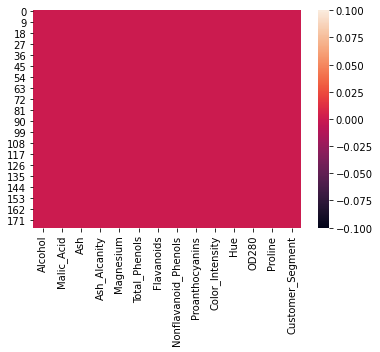

In [3]:
sns.heatmap(df.isnull())
plt.show()

In [4]:
# How many classes in customer _segement which want to predict
df["Customer_Segment"].value_counts()

2    71
1    59
3    48
Name: Customer_Segment, dtype: int64

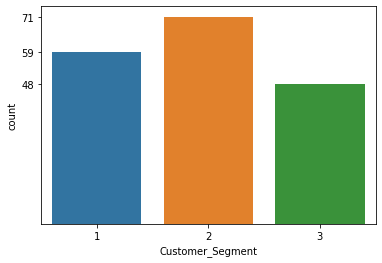

In [5]:
# Visualize the Customer_Segment.
sns.countplot(data=df,x="Customer_Segment")
c= df["Customer_Segment"].value_counts()
plt.yticks(c)
plt.show()

In [8]:
# Check the dataType
df.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
Customer_Segment          int64
dtype: object

In [9]:
# Selecting the Input and Output
X = df.drop("Customer_Segment",axis=1)
Y = df["Customer_Segment"]

In [10]:
# Train test split the data 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [11]:
# Scaling only on Input values
from sklearn.preprocessing import StandardScaler
# Create the Object of StandardScaler.
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [13]:
# Apply PCA Algorithms
from sklearn.decomposition import PCA
# Create the object of PCA
pca = PCA(n_components=None,random_state=1)
#n_components inbuilt parameters here pass no. of components means pc here total input 13 feature input features

In [14]:
X.shape

(178, 13)

In [16]:
# 
X_train_pc = pca.fit_transform(X_train) # HERE WE HAVE TO REDUCE THE INPUT 
X_test_pc = pca.transform(X_test)

In [20]:
explain_variance = pca.explained_variance_ratio_
print(explain_variance) # Automatic arrange the variance in descending order.

[0.35168281 0.19739103 0.11318949 0.07729222 0.06125164 0.05129145
 0.04229866 0.02624925 0.02426134 0.01824268 0.01580332 0.01324335
 0.00780277]


In [21]:
# Create the object of PCA class
pca1 = PCA(n_components=2,random_state=1)
# From the above explain variance clearly show we select only 2 feature. So. here pass on no. of component = 2